<a href="https://colab.research.google.com/github/vaishnavi123-cOde/assignment/blob/main/DS_Assignemnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

orders = pd.read_csv("orders.csv", low_memory=False)
train_customers = pd.read_csv("train_customers.csv")
train_locations = pd.read_csv("train_locations.csv")
vendors = pd.read_csv("vendors.csv")


orders['vendor_id'] = pd.to_numeric(orders['vendor_id'], errors='coerce')
orders['LOCATION_NUMBER'] = pd.to_numeric(orders['LOCATION_NUMBER'], errors='coerce')
orders_clean = orders.dropna(subset=['vendor_id', 'LOCATION_NUMBER'])


orders_merged = orders_clean.merge(train_customers, on='customer_id', how='left')
orders_merged = orders_merged.merge(train_locations, left_on=['customer_id', 'LOCATION_NUMBER'],
                                    right_on=['customer_id', 'location_number'], how='left')
orders_merged = orders_merged.merge(vendors, left_on='vendor_id', right_on='id', how='left')


In [ ]:
import pandas as pd

orders = pd.read_csv("orders.csv", low_memory=False)
train_locations = pd.read_csv("train_locations.csv")
test_locations = pd.read_csv("test_locations.csv")


orders['vendor_id'] = pd.to_numeric(orders['vendor_id'], errors='coerce')
orders['LOCATION_NUMBER'] = pd.to_numeric(orders['LOCATION_NUMBER'], errors='coerce')


orders_clean = orders.dropna(subset=['vendor_id', 'LOCATION_NUMBER'])


popular_vendor_by_location = (
    orders_clean.groupby('LOCATION_NUMBER')['vendor_id']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'vendor_id': 'most_popular_vendor'})
)


test = test_locations.copy()
test['LOCATION_NUMBER'] = pd.to_numeric(test['location_number'], errors='coerce')


test = test.merge(popular_vendor_by_location, on='LOCATION_NUMBER', how='left')

overall_most_popular_vendor = orders_clean['vendor_id'].value_counts().idxmax()
test['most_popular_vendor'].fillna(overall_most_popular_vendor, inplace=True)


test['cid x loc_num x vendor'] = (
    test['customer_id'] + ' x ' +
    test['LOCATION_NUMBER'].astype(int).astype(str) + ' x ' +
    test['most_popular_vendor'].astype(int).astype(str)
).str.lower()


test['target'] = 1


final = test[['cid x loc_num x vendor', 'target']]


final.to_csv("vendor_predictions.csv", index=False)




/tmp/ipython-input-2-1574061855.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['most_popular_vendor'].fillna(overall_most_popular_vendor, inplace=True)


Top Vendors by Order Count

Top 10 vendors by order count:
 vendor_id
113    7807
105    5562
79     5117
84     5001
78     4643
83     3684
386    3280
86     2837
846    2559
106    2263
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Ordered Vendors'}, xlabel='Vendor ID', ylabel='Order Count'>

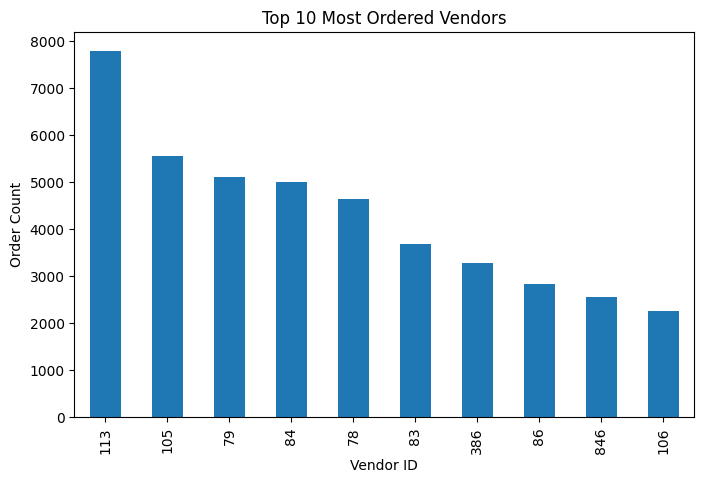

In [ ]:

top_vendors = orders['vendor_id'].value_counts().head(10)
print("Top 10 vendors by order count:\n", top_vendors)


top_vendors.plot(kind='bar', title='Top 10 Most Ordered Vendors', xlabel='Vendor ID', ylabel='Order Count', figsize=(8,5))


Number of orders per Customers

Top 10 customers by number of orders:
 customer_id
XW90EAP    262
TL7Z2DM    151
VDEJEMP    146
HJFTTGW    128
B28LJKM    119
2JJAO46    115
KXXRD9J    114
TVSPG2H    113
BUIAFFT    109
1P5RQ9H    107
Name: count, dtype: int64


<Axes: title={'center': 'Top 20 Customers by Order Count'}, xlabel='customer_id'>

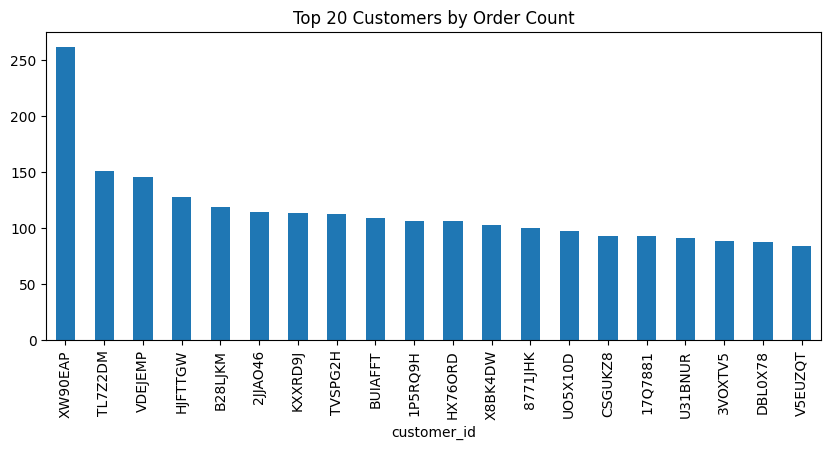

In [ ]:
orders_per_customer=orders['customer_id'].value_counts().head(10)
print("Top 10 customers by number of orders:\n", orders_per_customer)
orders['customer_id'].value_counts().head(20).plot(kind='bar', title='Top 20 Customers by Order Count', figsize=(10, 4))

Checking for missing values

In [ ]:
missing_summary = orders.isnull().mean().sort_values(ascending=False)
print("Missing value ratio per column:\n", missing_summary.head(10))

Missing value ratio per column:
 promo_code                        0.968183
delivery_time                     0.962137
delivery_date                     0.737301
vendor_rating                     0.665787
driver_accepted_time              0.656637
promo_code_discount_percentage    0.513093
preparationtime                   0.410634
picked_up_time                    0.380169
ready_for_pickup_time             0.377331
delivered_time                    0.366304
dtype: float64


Location numbers distribution

<Axes: title={'center': 'Distribution of Location Numbers'}, xlabel='location_number'>

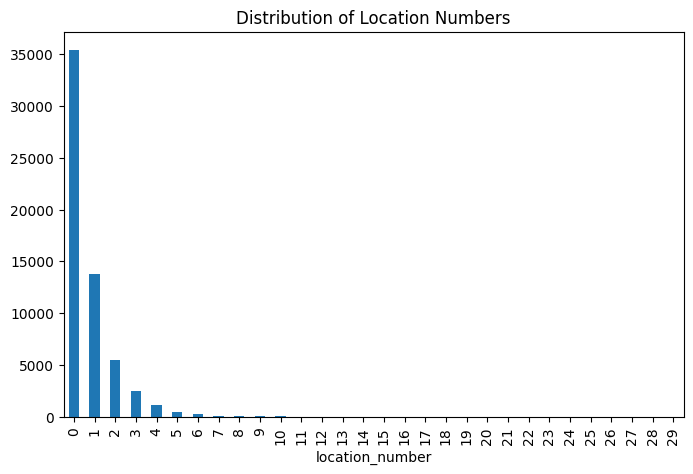

In [ ]:
train_locations['location_number'].value_counts().sort_index().plot(kind='bar', title='Distribution of Location Numbers', figsize=(8,5))